<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_Python/blob/main/ISLR_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2

## Conceptual

### Questions 1a-1d
For each of parts (a) through (d), indicate whether we would generally expect the performance of a fexible statistical learning method to be better or worse than an infexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

(b) The number of predictors p is extremely large, and the number of observations n is small.

(c) The relationship between the predictors and response is highly non-linear.

(d) The variance of the error terms, i.e. σ2 = Var($\epsilon$), is extremely high.

### Answers
From section 2.2.2 in the book, we learn about the **Bias-Variance Trade-Off**.  Roughly speaking, every statistical model will make errors.  These errors are attributed to 3 sources:
*   **Bias**, which is a sytematic deviation of the model's estimates from reality.  Bias generally stems from a model's inability to capture complexities in the data; increasing the *flexibility of the model* reduces bias.
*   **Variance**, which is the *fickleness* of the model's estimates; we can think of it as *how variable are the model's estimates given different samples of data?*  Variance generally stems from a model's flexibility that inadvertantly captures apparent patterns in the sample data that don't actually exist in reality; reducing a model's flexibility reduces bias.
*   **Irreducible Error**, which a source of error that cannot be altered by changing the flexibility of the model.  Why?  Because it is *random* and therefore cannot be modeled.

So we see a *trade-off* between bias and variance: increasing a model's flexibility decreases bias but increases variances; decreasing a model's flexibility increases bias but descreases variance.  Luckily, the changes to bias and variance are not one-to-one linear.  The goal/hope is to create a model that has both low bias and low variance.

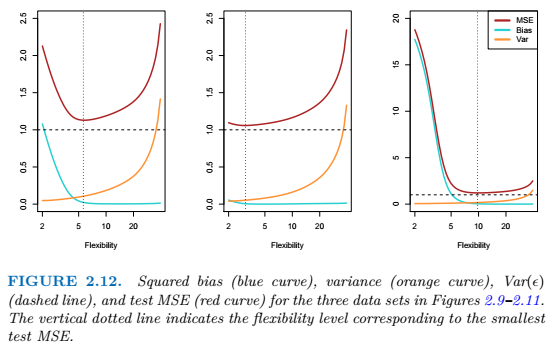

But here's the difficulty.  We don't/can't know how to attribute our error to these 3 sources--though we'll later see ways of estimating this.  The reason this causes problems is that, if we don't know what is causing the error, then we don't know if- or which way to adjust our model.  If the error is mostly due to irreducible error, it may be best to do nothing.  If it's mostly due to bias, we should probably increase the model's flexibility; but if it's mostly due to variance, then increasing the model's flexibiilty makes the model worse.  Vice versa if the error is mostly due to variance.

There's two remedies to this problem.  First, like I said, we'll later learn ways estimate the three types of error.  Second, we can make broad generalizations about when each source of error are likley to be important.  That's what we'll do here.

Before answer the questions directly, I think it will help if we get a sense of these errors arising.  Say you want to build a model for risk of heart attack.  First, you'll need data.  You're not going to collect data on every heart attack--there's too many; rather, you collect a sample of data.

Now you'll train you model on the data.  Probably, the factors related to heart attack are many and complicated: certainly age is important, but so are family history, genetics, stress levels, lifestyle, and other things we don't know about.

Ideally, your model will include predictors for every real predictor and no predictors for fake predictors.  For example, hopefully the model includes terms for age, family history, etc., but not for, say, pieces of birthday cake consumed at 7th birthday.

But ideal is not realistic.  For one, we can't account for the things that we don't know about!  Second, certain factors may relate to heart attack, but only minimally so that they are uninteresting.  Thirdly, and this is beyond our scope here, but certain combinations of predictors can mask other real factors or implicate fake factors.

So we typically cannot account for all predictors, but everyone we omit can bias our model.

Then why not just add all/many conceivable predictors, just to be safe?  Recall that our data contains only a small subset of all possible data.  In other words, we could have attained a different sample.  If we trained our model on that different dataset, the model would produce different estimates.  If our model only contains predictors for real relationships to heart attack, we should expect that the difference between model estimates will be minimal.  

But say your model contains a term to predict the effect of *birthday cake* on heart attack risk.  The number of birthday cake consumed on one's 7th birthday probably doesnt relate to heart attack risk (or at least let us stipulate that it does not).  But by mere coincidence, we may gather a weird data sample for which more birthday cake was eaten by those at lower risk of heart attack.  So our model, trained on this data, will make think that we should/can use birthday cake to predict heart attacks.  

Since birthday cake does not actually predict heart attack, we call this random association, unique to the sample dataset, **overfitting** since the model is inappropriately fitting to a fake relation.  Of course, a different data sample would find no such relationship.  This difference in model estimates across datasets is variance.

So by adding more predictors, i.e., making our model more flexible, we increse the risk of overfitting and thus increasing model variance.

#### 1a
Two important things happen with more data:
*   The impact of extreme observations in the data sample tend to be *washed out* by a combination of many non-extreme observations and oppositely-extreme observations.  If we imagine taking many large data samples, then, we should expect lower variance across data samples.
*   The features (predictors) of the data are represented with greater detail.  Thus, we can afford more-flexible models because features in the data sample are more likely to be *real*.

The model described here, a large sample size with few predictors, will have low variance but may have some bias that could be removed by making the model more flexible.

#### 1b
This model, flexible for having many predictors, is expected to perform worse than an inflexible model (with fewer predeictors).  Why?  Each predictor in the model needs some amount of information to be estimated well.  The information that may help inform about predictor $x_1$ contained within an observation is confounded by other information within the same observation about $x_2$.  When there are only few observations, we cannot disambiguate these informations.  Thus, a flexible model (with many predictors) will not be able to estimate the relationships of the many predictors to the response very well.


#### 1c
When the relationship between predictor(s) and response is simple (e.g., linear), inflexible models with moderate data do fine.  All else being equal, then, a complex relationship will decrease the performance of our models.

Here, the relationship between the predictor(s) and response are complex (nonlinear), so we expect an flexible model to perform  better.  It should perform better than an inflexible model since adding more predictors will capture more complexity in the data.

#### 1d
When the data is highly variable **due to high irreducible error**, a flexible model will tend to perform worse than an inflexible model.  Why?  Recall that irreducible error cannot be modeled and therefore cannot be reduced by adjusting the flexibility of our model.  If we make our model more flexible by adding predictors, the model will not *know* about the irreducible error and try to estimate it anyway.  But since its estimates cannot truly map onto the irreducible error, the model will *overfit* the data sample.  A differen data sample will cause radically different estimates.  Thus, the highly-flexible model will be too variable.

### Questions 2a-2c
Explain whether each scenario is a classifcation or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

(a) We collect a set of data on the top 500 firms in the US. For each firm we record proft, number of employees, industry and the CEO salary. We are interested in understanding which factors afect CEO salary.

(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

### Answers
In general, classification methods are used for prediction while regression may be used for either prediction or classification.  The reason is that classification methods tend to abstract the data in ways that are difficult to interpret but which can be used to predict.  Conversely, regression methods tend to retain data in interpretable forms; this allows us to make predictions, but also to infer how the data contributes to predictions.  There is some grey area here: some regression methods (i.e., "logistic regression") can be used for classification.  Thus, these categories are not hard and fast, but they serve as useful guidelines.

#### 2a
**Regression, Inference**  Here, we want to understand what affects CEO salary; therefore, we are interested in *inference*.  Understanding the contribution of each factor to salary is best done with *regression*.

n=500 top firms in US

p=3 (profit, number of employees, industry)

A regression for this may look like $Salary = \alpha * Profit + \beta * employees + \gamma * industry$.  The $\alpha$, $\beta$, and $\gamma$ terms tell us how much their corresponding predictor variables contribute to expected $Salary$.  Thus, we can understand each of their contributions; but we could also predict $Salary$.

#### 2b
**Classification, Prediction**  Our interest is in trying to determine if a product will succeed or fail; that is, will it be in the class "success" or in the class "failure"?

n=20 similar products that were previously launched

p=13 (price, marketing budget, competition price, ten other variables)

Many classification methods are a bit "black box".  Here, we might put each of the p predictor variables into a black box and it would abstract that data and then make predictions.  Conversely, we might use something like logistic regression, which would also make predictions but could be used to make inferences about how each predictor variable affects the success/failure of a product.


#### 2c
**Regression, Prediction**  We are only interested in *predicting* the exchange rate.  If we wanted to know if it would go up or down, this could be a classification problem.  But since we want to predict the actual amount of change, we use regression.

n=52 weeks of 2012

p=3 (% changes in US, British, and German markets)

A regression here may look like $USD/EURO = \alpha * US + \beta * UK + \gamma * Germany$.  We could find the estimated contribution of each country to the outcome, and thereby make inferences about these variables, or simply predict the % change for USD/EURO.

### Questions 3a-3b
We now revisit the bias-variance decomposition.

(a) Provide a sketch of typical
*   (squared) bias,
*   variance,
*   training error,
*   test error,
*   and Bayes (or irreducible) error curves,

on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

(b) Explain why each of the five curves has the shape displayed in part (a).

### Answers
I'm going to cheat a bit and just link to my [YouTube video here](https://youtu.be/Uv5gAS5OrJ8)

### Questions 4a-4c
You will now think of some real-life applications for statistical learning.

(a) Describe three real-life applications in which classifcation might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

(c) Describe three real-life applications in which cluster analysis might be useful.

### Answers
Obviously, answers will vary here.  Although the question asks for 3 applications, I'll just provide 1.

#### (a)
Self-driving car discerning humans (pedestrians) from non-human objects.  The response is judgement of this distinction.  Predictors may be shape and movement of objects.  Although not future tense, this is an example of prediction since we don't care *how* the predictor variables impact the prediction--only that the car doesn't run over humans.

#### (b)
Projecting an individuals income.  The response is future income.  Predictor variables may include current income, age, parental income, education, career, etc.  We may use this regression to predict future income.  But it can also be used for inference since one might wish to know how they could raise future income by manipulating the feature of their lives represented in the regression.

#### (c)
Categorizing brain states.  Here, we may not have any sense of clear categories.  But we can use, say, EEG data to find *clusters* of brain states.

### Question 5
What are the advantages and disadvantages of a very fexible (versus a less fexible) approach for regression or classifcation? Under what circumstances might a more fexible approach be preferred to a less fexible approach? When might a less fexible approach be preferred?

### Answer
The flexibility of a model is double-edged.  On one hand, increasing a model's flexibility makes it possible to fit more-complex data; the extent to which adding flexibility does overcome complexity reduces one cause of error, **bias**.  On the other hand, flexibility in excess of the data's complexity increases another cause of error, **variance**.

Unfortunately, we do not generally know the complexity of our data (if we did, we probably wouldn't need to analyze/model it).  This makes it difficult to know precisely how flexible to make our models.  If we underdo it, we allow too much bias into our analysis.  Conversely, overdoing it allows too much variance into our analysis.

Flexible methods may be preferred when we have lots of data (to better explicate complexities in the data) or are primarily concerned with prediction rather than inference.  Conversely, less-flexible methods are preferred when there is little data or we are primarily concerned with inferring how predictors related to outcomes.

For more, see the [answer video from Question 3](https://youtu.be/Uv5gAS5OrJ8).

### Question 6
Describe the diferences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classifcation (as opposed to a nonparametric approach)? What are its disadvantages?

### Answer
Parametric methods assume features about the relationships among variables, outcomes with predictors, while non-parametric methods do not.

The assumptions of a parametric model present a tradeoff: if the assumptions are reasonably accurate, then they provide information that essentially adds information that is compatible with the information provided by the data.  In other words, accurate assumptions can reduce the amount of data necessary to fit a model.  However, inaccurate assumptions have an opposite effect: instead of facilitating model fit, the information inherent to inaccurate assumptions provides information that is at odds with the information in the data; more data is then needed to fit the model.  We might call the information present in the assumptions of a model its "priors", in a Bayesian context, or its "bias", in many machine-learning contexts (this use of bias is conceptually related to the term in mean squared error, but necessarily identical).  Non-parametric models avoid the risk of inaccurate assumptions, but miss out on the efficiency that accurate assumptions can provide.  

An example of a parametic approach is linear regression--where we assume that the relationship between the outcome $y$ and predictors $x_m$ are linear:  

> $y = \alpha + \beta_{1} x_1 + \beta_{2} x_2$

The assumptions are explicit in the equation; y is the sum of the terms of the right.  But say that, in reailty, y is more closely modeled like:
> $y = \alpha + \beta_{1} x_1 + \beta_{2} x_2 + \beta_3 (x_1*x_2)$.

Then our model will have a tough time fitting the data; how tough it is is due to the bias created by our inaccurate assumptions.

It's a little harder to demonstrate a non-parametric method. One set of examples are rank-based hypothesis tests like the Wilcoxon test.  Whereas with parametric regression, we could perform a hypothesis test of $x_1$ by looking at the p-value of its $\beta_1$ coefficient (if that doesn't make sense, the book gets to it eventually), a rank-based test would first rank order the $y$ values then ask if the $y$ values, partitioned by $x$, look randomly sorted or not (if they do, then we would conclude that $x$ is not significantly related to $y$).
